In [53]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 6 - Reinforcement Learning/Section 32 - Upper Confidence Bound (UCB)/Python/Ads_CTR_Optimisation.csv')
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [60]:
df.describe()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [61]:
#Model Creation
N = 10000 #records
ads = 10

# s1:
ads_selected = []
no_of_selections = [0]*ads  #list of size-10 initialized with 0
sum_of_rewards = [0]*ads    #[0,0,0,0,0,0,0,0,0,0]
total_reward = 0

In [62]:
# s1&2 continued
import math
for n in range(0,N):
  ad = 0
  max_upper_bound = 0
  for i in range(0,ads):
    if(no_of_selections[i]>0):
      average_reward = sum_of_rewards[i]/no_of_selections[i];
      delta_i = math.sqrt((3/2)*math.log(n+1)/no_of_selections[i])
      upper_bound =   average_reward + delta_i
    else:
      upper_bound = 1e400
    if(upper_bound>max_upper_bound):
      max_upper_bound=upper_bound
      ad=i
  no_of_selections[ad]=no_of_selections[ad]+1
  ads_selected.append(ad)
  reward = df.values[n,ad] #if ad[i] is selected or not
  sum_of_rewards[ad] += reward
  total_reward += reward

In [64]:
total_reward

2178

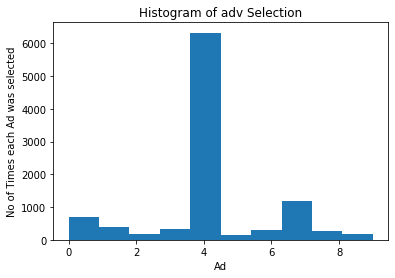

In [63]:
#visualizing the model
plt.hist(ads_selected)
plt.title('Histogram of adv Selection')
plt.xlabel('Ad')
plt.ylabel('No of Times each Ad was selected')
plt.show()